In [1]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

In [2]:
df = pd.read_csv("full_raw_dataset.csv")

In [3]:
df.shape

(356251, 798)

In [4]:
features = pd.read_csv("custom_features.csv", header=0).FEATURE.to_list()

In [5]:
df = df[features]

In [6]:
df.shape

(356251, 140)

In [7]:
df = df.dropna(how="any", axis="index", subset="TARGET")

In [8]:
df.shape

(307507, 140)

In [9]:
features_to_drop = [_col for _col in df.columns if _col.count('nan')]

In [10]:
df = df.drop(columns=features_to_drop)

In [11]:
df.shape

(307507, 140)

In [12]:
df_nan = df.isna().mean().sort_values(ascending=False).to_frame().rename(columns={0:"prop_nan"})

In [13]:
df = df[df_nan.loc[df_nan.prop_nan <= 0.10,:].index]

In [14]:
df.columns[:100]

Index(['INSTAL_PAYMENT_PERC_MEAN', 'INSTAL_PAYMENT_PERC_SUM',
       'INSTAL_AMT_PAYMENT_MEAN', 'INSTAL_AMT_PAYMENT_MAX',
       'INSTAL_AMT_PAYMENT_MIN', 'INSTAL_PAYMENT_PERC_MAX', 'INSTAL_DBD_MAX',
       'INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE', 'INSTAL_DPD_MAX',
       'INSTAL_DPD_MEAN', 'INSTAL_DPD_SUM', 'INSTAL_COUNT', 'INSTAL_DBD_MEAN',
       'INSTAL_DBD_SUM', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'PAYMENT_RATE',
       'ANNUITY_INCOME_PERC', 'INCOME_PER_PERSON', 'CNT_FAM_MEMBERS',
       'ORGANIZATION_TYPE_Medicine', 'ORGANIZATION_TYPE_Insurance',
       'ORGANIZATION_TYPE_Kindergarten', 'ORGANIZATION_TYPE_Legal Services',
       'ORGANIZATION_TYPE_Police', 'ORGANIZATION_TYPE_Military',
       'ORGANIZATION_TYPE_Mobile', 'ORGANIZATION_TYPE_Other',
       'ORGANIZATION_TYPE_Industry: type 8', 'ORGANIZATION_TYPE_Postal',
       'ORGANIZATION_TYPE_Industry: type 9',
       'ORGANIZATION_TYPE_Industry: type 4',
       'ORGANIZATION_TYPE_Industry: type 7',
       'ORGANIZATION_TYPE_Indu

In [15]:
df_quanti = df[df.dtypes[df.dtypes == "float64"].index]

In [16]:
df_quanti.shape

(307507, 25)

In [17]:
df_quanti.head()

,INSTAL_PAYMENT_PERC_MEAN,INSTAL_PAYMENT_PERC_SUM,INSTAL_AMT_PAYMENT_MEAN,INSTAL_AMT_PAYMENT_MAX,INSTAL_AMT_PAYMENT_MIN,INSTAL_PAYMENT_PERC_MAX,INSTAL_DBD_MAX,INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE,INSTAL_DPD_MAX,INSTAL_DPD_MEAN,...,AMT_ANNUITY,PAYMENT_RATE,ANNUITY_INCOME_PERC,INCOME_PER_PERSON,CNT_FAM_MEMBERS,INCOME_CREDIT_PERC,TARGET,REGION_POPULATION_RELATIVE,AMT_CREDIT,AMT_INCOME_TOTAL
0,1.000000,19.0,11559.247105,53093.745,9251.775,1.0,31.0,2.0,0.0,0.000000,...,24700.5,0.060749,0.121978,202500.0,1.0,0.498036,1.0,0.018801,406597.5,202500.0
1,1.000000,25.0,64754.586000,560835.360,6662.970,1.0,14.0,2.0,0.0,0.000000,...,35698.5,0.027598,0.132217,135000.0,2.0,0.208736,0.0,0.003541,1293502.5,270000.0
2,1.000000,3.0,7096.155000,10573.965,5357.250,1.0,11.0,2.0,0.0,0.000000,...,6750.0,0.050000,0.100000,67500.0,1.0,0.500000,0.0,0.010032,135000.0,67500.0
3,1.000000,16.0,62947.088438,691786.890,2482.920,1.0,77.0,2.0,0.0,0.000000,...,29686.5,0.094941,0.219900,67500.0,2.0,0.431748,0.0,0.008019,312682.5,135000.0
4,0.954545,63.0,12214.060227,22678.785,0.180,1.0,31.0,2.0,12.0,0.954545,...,21865.5,0.042623,0.179963,121500.0,1.0,0.236842,0.0,0.028663,513000.0,121500.0


<AxesSubplot:>

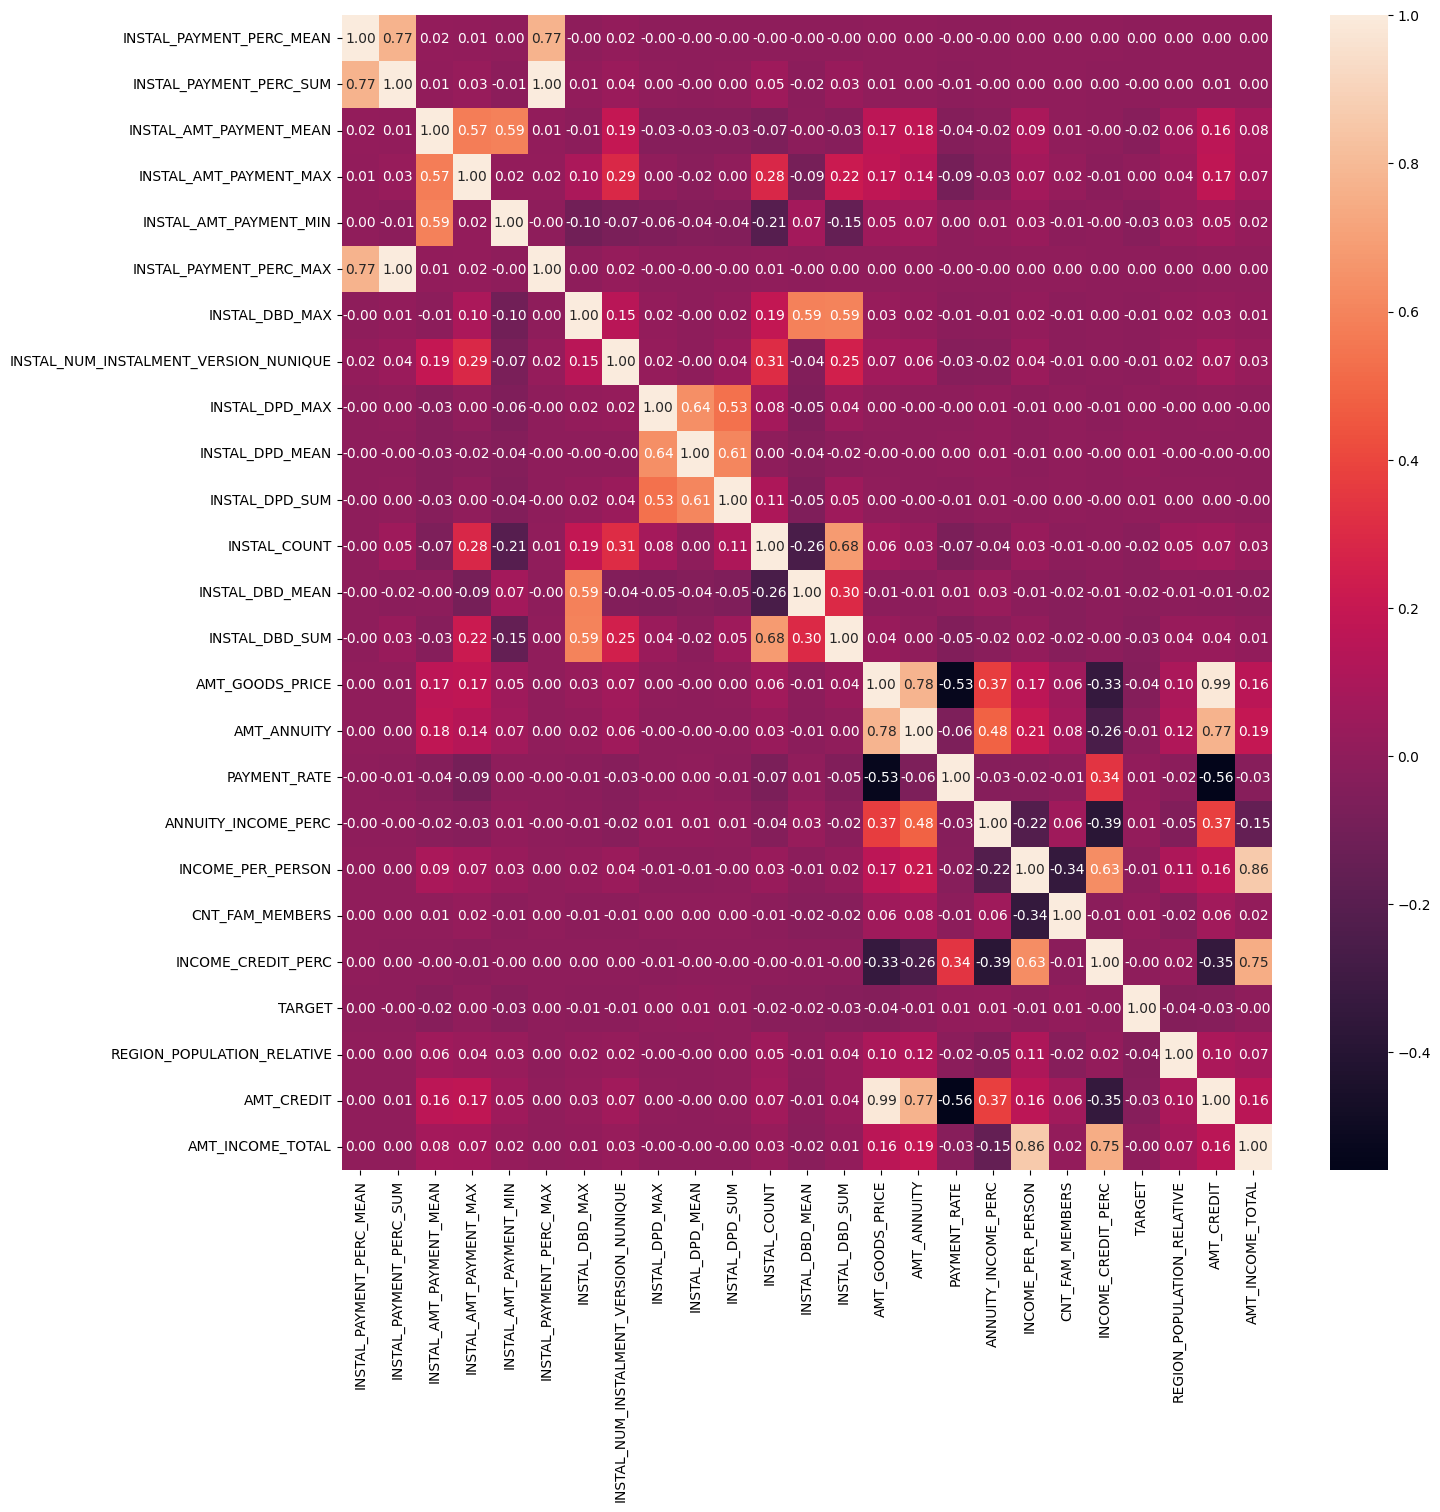

In [18]:
plt.figure(figsize=[15,15])
sns.heatmap(df_quanti.corr(), annot=True, fmt=".2f")

In [19]:
quanti_features_to_drop = ["AMT_GOODS_PRICE", "AMT_INCOME_TOTAL", "INCOME_PER_PERSON", "AMT_ANNUITY", "INSTAL_AMT_PAYMENT_MAX", "INSTAL_PAYMENT_PERC_SUM", "INSTAL_AMT_PAYMENT_MEAN", "INSTAL_PAYMENT_PERC_MAX"]

In [20]:
df_quanti = df_quanti.drop(columns=quanti_features_to_drop)

<AxesSubplot:>

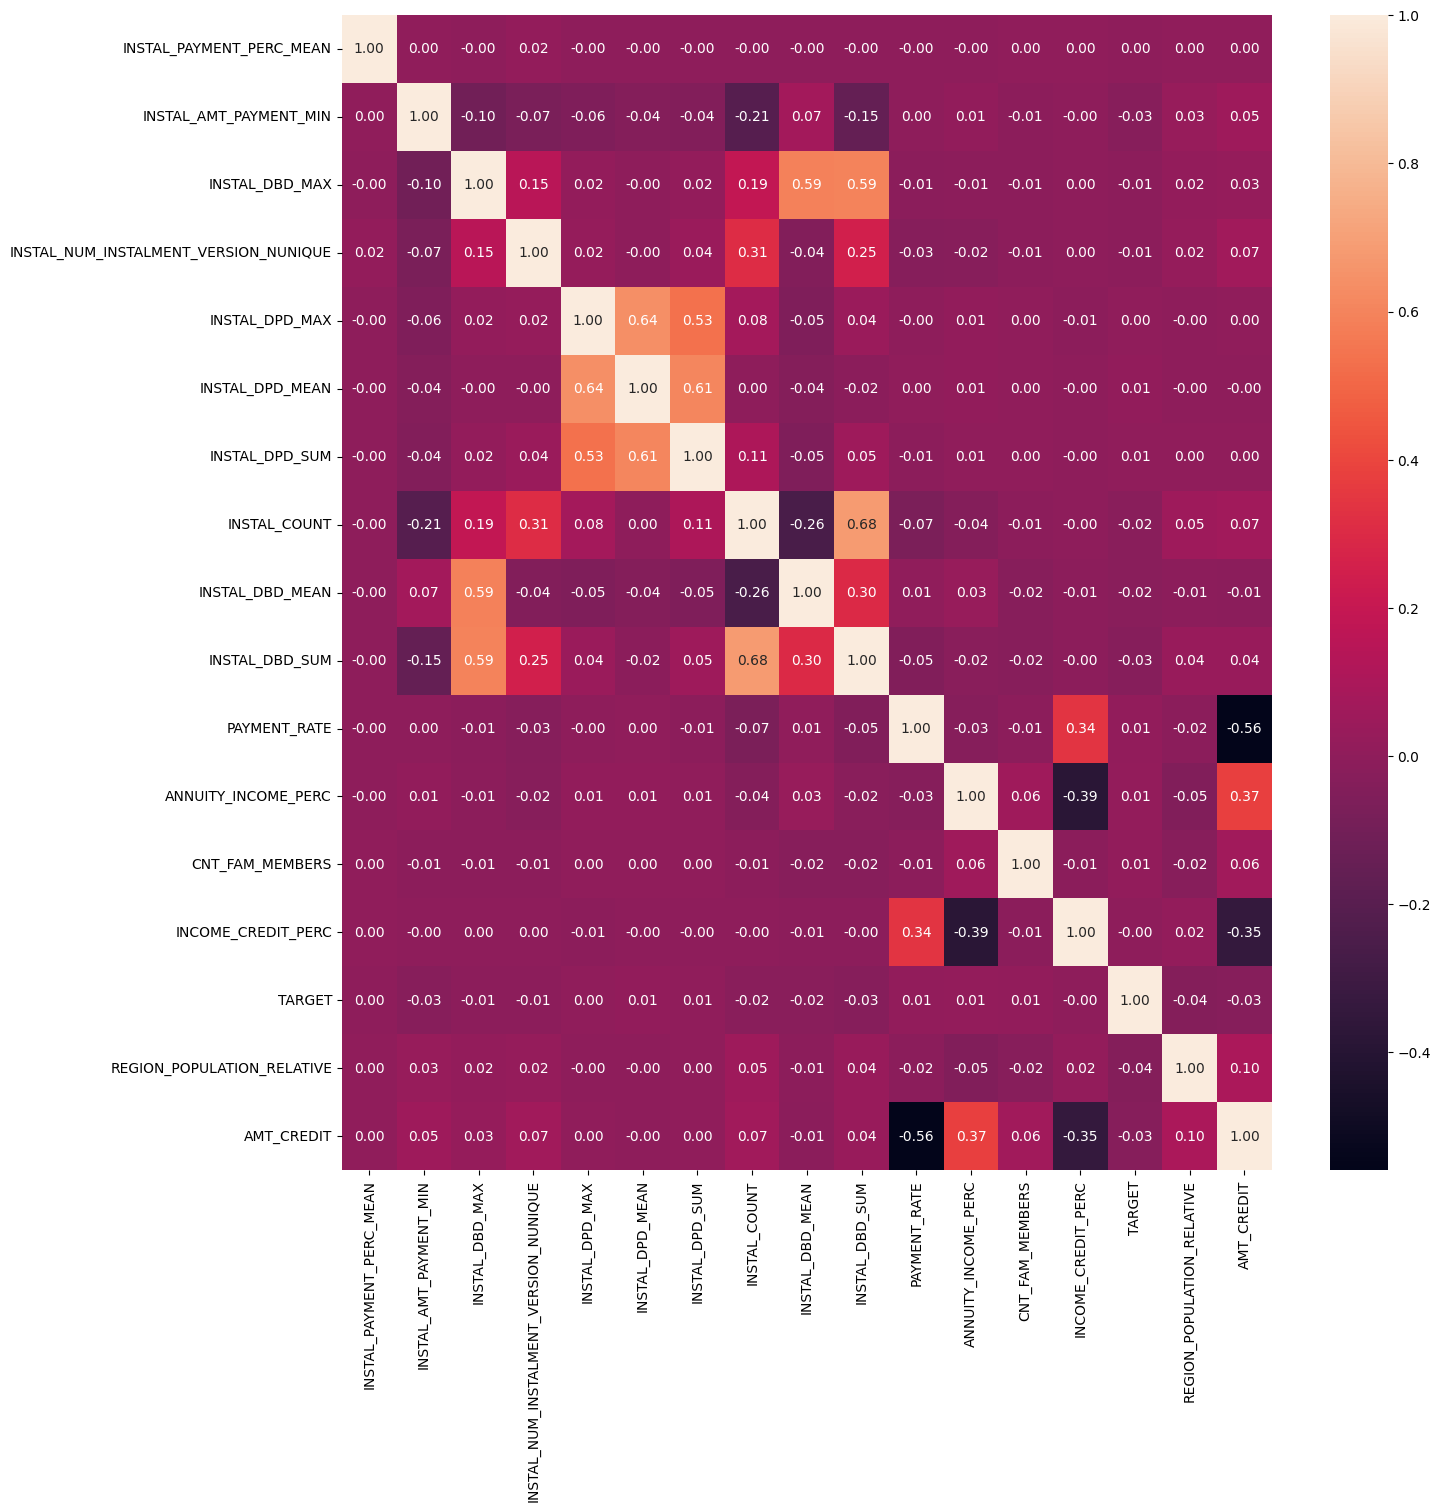

In [21]:
plt.figure(figsize=[15,15])
sns.heatmap(df_quanti.corr(), annot=True, fmt=".2f")

In [22]:
df = df.drop(columns=quanti_features_to_drop)

In [23]:
df.shape

(307507, 130)

In [24]:
df = df.dropna(how="any", axis="index")

In [25]:
df.shape

(291601, 130)

In [26]:
df.to_csv("full_clean_dataset.csv", index=False)

In [44]:
del df

In [35]:
df_previous = pd.read_csv("./data/previous_application.csv")

In [89]:
df = df_previous[["AMT_CREDIT", "RATE_INTEREST_PRIVILEGED", "AMT_ANNUITY", "AMT_APPLICATION", "CNT_PAYMENT"]]
df["AMT_PAID"] = df.CNT_PAYMENT * df.AMT_ANNUITY
df["AMT_INTEREST"] = df.AMT_PAID - df.AMT_CREDIT
df["RATE_INTEREST"] = (df.AMT_INTEREST / df.AMT_CREDIT) * 100
df

/tmp/ipykernel_3246/3753816554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["AMT_PAID"] = df.CNT_PAYMENT * df.AMT_ANNUITY
/tmp/ipykernel_3246/3753816554.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["AMT_INTEREST"] = df.AMT_PAID - df.AMT_CREDIT
/tmp/ipykernel_3246/3753816554.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

,AMT_CREDIT,RATE_INTEREST_PRIVILEGED,AMT_ANNUITY,AMT_APPLICATION,CNT_PAYMENT,AMT_PAID,AMT_INTEREST,RATE_INTEREST
0,17145.0,0.867336,1730.430,17145.0,12.0,20765.16,3620.16,21.114961
1,679671.0,NaN,25188.615,607500.0,36.0,906790.14,227119.14,33.416041
2,136444.5,NaN,15060.735,112500.0,12.0,180728.82,44284.32,32.455922
3,470790.0,NaN,47041.335,450000.0,12.0,564496.02,93706.02,19.903995
4,404055.0,NaN,31924.395,337500.0,24.0,766185.48,362130.48,89.624056
...,...,...,...,...,...,...,...,...
1670209,311400.0,NaN,14704.290,267295.5,30.0,441128.70,129728.70,41.659827
1670210,64291.5,NaN,6622.020,87750.0,12.0,79464.24,15172.74,23.599916
1670211,102523.5,NaN,11520.855,105237.0,10.0,115208.55,12685.05,12.372822
1670212,191880.0,NaN,18821.520,180000.0,12.0,225858.24,33978.24,17.708068


In [117]:
gain = df.AMT_INTEREST.to_frame()

In [37]:
df_all = pd.read_csv("full_raw_dataset.csv")

In [92]:
df_current = df_all[["INSTAL_DBD_SUM", "INSTAL_DPD_SUM", "AMT_ANNUITY", "AMT_CREDIT", "TARGET", "INSTAL_PAYMENT_DIFF_SUM"]]
df_current["DURATION_DAYS"] = df_current.INSTAL_DBD_SUM + df_current.INSTAL_DPD_SUM
df_current["DURATION_YEARS"] = df_current.DURATION_DAYS / 365
df_current["TOTAL"] = df_current.DURATION_YEARS * df_current.AMT_ANNUITY
df_current

/tmp/ipykernel_3246/350055865.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current["DURATION_DAYS"] = df_current.INSTAL_DBD_SUM + df_current.INSTAL_DPD_SUM
/tmp/ipykernel_3246/350055865.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current["DURATION_YEARS"] = df_current.DURATION_DAYS / 365
/tmp/ipykernel_3246/350055865.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

,INSTAL_DBD_SUM,INSTAL_DPD_SUM,AMT_ANNUITY,AMT_CREDIT,TARGET,INSTAL_PAYMENT_DIFF_SUM,DURATION_DAYS,DURATION_YEARS,TOTAL
0,388.0,0.0,24700.5,406597.5,1.0,0.000,388.0,1.063014,26256.969863
1,179.0,0.0,35698.5,1293502.5,0.0,0.000,179.0,0.490411,17506.935616
2,23.0,0.0,6750.0,135000.0,0.0,0.000,23.0,0.063014,425.342466
3,310.0,0.0,29686.5,312682.5,0.0,0.000,310.0,0.849315,25213.191781
4,303.0,63.0,21865.5,513000.0,0.0,29857.365,366.0,1.002740,21925.405479
...,...,...,...,...,...,...,...,...,...
356246,22.0,0.0,17473.5,412560.0,NaN,0.000,22.0,0.060274,1053.197260
356247,438.0,38.0,31909.5,622413.0,NaN,22974.165,476.0,1.304110,41613.484932
356248,253.0,0.0,33205.5,315000.0,NaN,0.000,253.0,0.693151,23016.415068
356249,211.0,1.0,25128.0,450000.0,NaN,0.000,212.0,0.580822,14594.893151


In [108]:
unpaid = df_current.loc[df_current.INSTAL_PAYMENT_DIFF_SUM >= 0,["INSTAL_PAYMENT_DIFF_SUM"]]

In [109]:
unpaid.describe()

,INSTAL_PAYMENT_DIFF_SUM
count,2.995360e+05
mean,2.891273e+04
std,8.508823e+04
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,2.065278e+04
max,3.037736e+06


<AxesSubplot:>

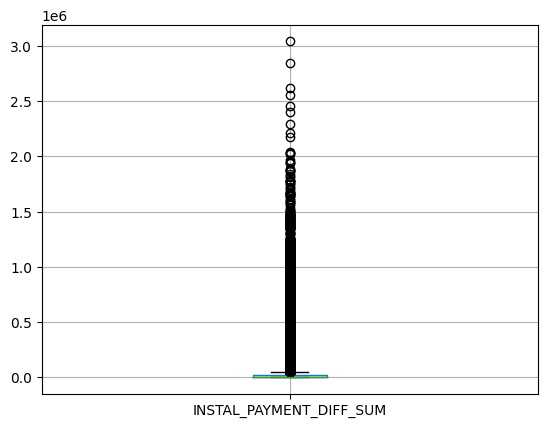

In [110]:
unpaid.boxplot()

array([[<AxesSubplot:title={'center':'INSTAL_PAYMENT_DIFF_SUM'}>]],
      dtype=object)

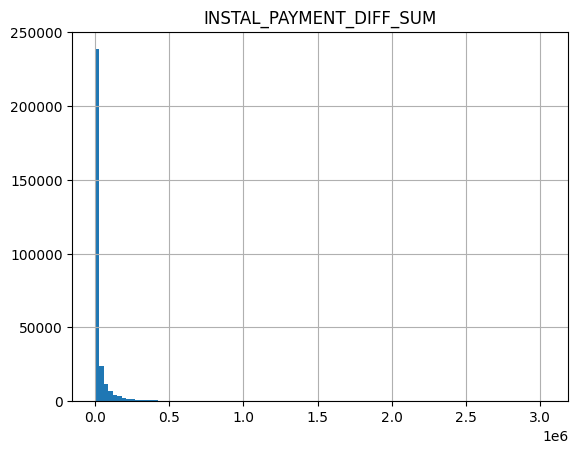

In [113]:
unpaid.hist(bins=100)

In [118]:
gain.describe()

,AMT_INTEREST
count,1.297978e+06
mean,9.089782e+04
std,2.732930e+05
min,-2.250000e+06
25%,6.881940e+03
50%,1.836810e+04
75%,8.344962e+04
max,3.926250e+06


<AxesSubplot:>

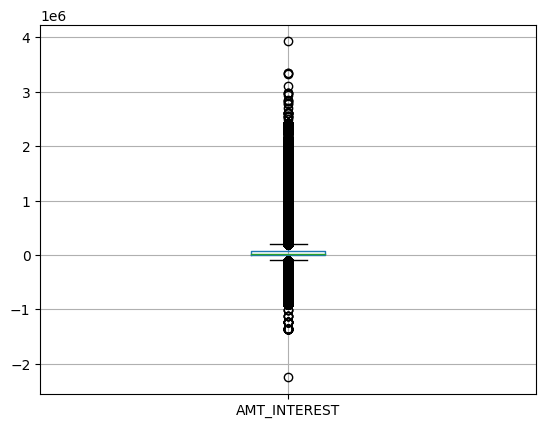

In [119]:
gain.boxplot()

array([[<AxesSubplot:title={'center':'AMT_INTEREST'}>]], dtype=object)

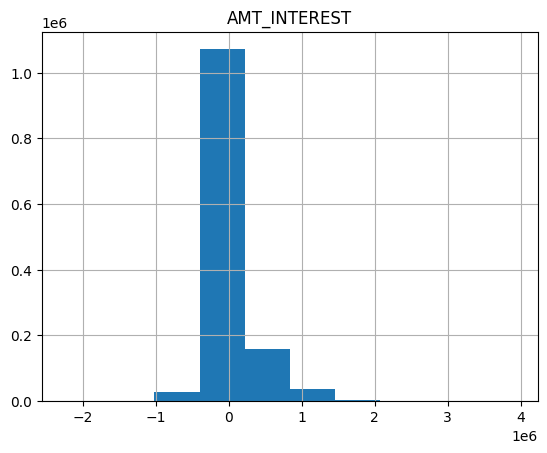

In [120]:
gain.hist()

In [123]:
gain["sign"] = np.where(gain.AMT_INTEREST >= 0, "+", "-")
gain["AMT_INTEREST"] = np.abs(gain.AMT_INTEREST)

In [124]:
gain.groupby("sign").describe()

AMT_INTEREST                                                             \
            count          mean            std      min       25%        50%   
sign                                                                           
+       1154562.0  131216.57993  252294.859031     0.00   9819.54   23353.92   
-        143416.0  233685.93616  212356.979150  1268.28  67500.00  180000.00   

                           
           75%        max  
sign                       
+     107672.4  3926250.0  
-     270000.0  2250000.0

gain net = nb_approved * mean_gain - nb_rejected * mean_loss

In [ ]:
def predict_gain(seuil: float, data: pd.DataFrame) -> float:
    MEAN_GAIN = 131216
    MEAN_LOSS = 233685
    nb_total = data.shape[0]
    df_approved = data.loc[data.proba > seuil,:]
    nb_approved = df_approved.shape[0]
    return nb_approved * MEAN_GAIN - (nb_total - nb_approved) * MEAN_LOSS